In [222]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
from sklearn.preprocessing import OneHotEncoder

In [223]:
df=pd.read_csv("matches.csv")
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [224]:
df["team"].unique()

array(['Manchester City', 'Chelsea', 'Arsenal', 'Tottenham Hotspur',
       'Manchester United', 'West Ham United', 'Wolverhampton Wanderers',
       'Newcastle United', 'Leicester City', 'Brighton and Hove Albion',
       'Brentford', 'Southampton', 'Crystal Palace', 'Aston Villa',
       'Leeds United', 'Burnley', 'Everton', 'Watford', 'Norwich City',
       'Liverpool', 'Fulham', 'West Bromwich Albion', 'Sheffield United'],
      dtype=object)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   float64
 9   ga            1389 non-null   float64
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   float64
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

In [226]:
df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,693.000000,0.0,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,22.771778,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,NaN,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844
std,13.668172,1.274235,1.291049,0.767268,0.789360,12.401897,17797.991778,NaN,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,11.000000,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000
50%,22.000000,1.000000,1.000000,1.200000,1.200000,50.000000,32061.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000
75%,33.000000,2.000000,2.000000,1.800000,1.800000,59.000000,52214.000000,NaN,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000
max,59.000000,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,NaN,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000


In [227]:
df.shape

(1389, 28)

In [228]:
df["team"].value_counts()

team
Manchester United           72
West Ham United             72
Newcastle United            72
Brighton and Hove Albion    72
Southampton                 72
Tottenham Hotspur           71
Manchester City             71
Leeds United                71
Wolverhampton Wanderers     71
Arsenal                     71
Crystal Palace              71
Burnley                     71
Chelsea                     70
Aston Villa                 70
Leicester City              70
Everton                     70
West Bromwich Albion        38
Fulham                      38
Liverpool                   38
Sheffield United            38
Brentford                   34
Norwich City                33
Watford                     33
Name: count, dtype: int64

In [229]:
df[df["team"]=="Liverpool"]

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
705,1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,...,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
706,2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,...,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
707,4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,...,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
708,6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,...,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
709,7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,...,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
710,9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,...,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
711,11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,...,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
712,13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,...,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
713,14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,...,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool
714,16,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,...,Match Report,NaN,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool


In [230]:
df["date"]=pd.to_datetime(df["date"])

In [231]:

df["target"] = (df["result"] == "W").astype("int")

In [232]:
df.dtypes

Unnamed: 0               int64
date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
target                   int64
dtype: object

In [233]:
df["venue"]=df["venue"].astype("category").cat.codes

In [234]:
df["opponent_code"]=df["opponent"].astype("category").cat.codes

In [235]:

df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")

In [236]:
df["day_code"] = df["date"].dt.dayofweek

In [237]:
train = df[df["date"] < '2022-01-01']
test = df[df["date"] > '2022-01-01']

predictors = ["venue", "opponent_code", "hour", "day_code"]
target = "target"

In [238]:
X = df[predictors]
y = df[target]

In [239]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [240]:

numeric_features = ["hour", "day_code"]
categorical_features = ["venue", "opponent_code"]

numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('label', LabelEncoder())  
])


In [241]:

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [242]:

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    ))
])


In [243]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Accuracy:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy:
 0.6294964028776978
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.87      0.75       173
           1       0.52      0.23      0.32       105

    accuracy                           0.63       278
   macro avg       0.59      0.55      0.53       278
weighted avg       0.60      0.63      0.58       278



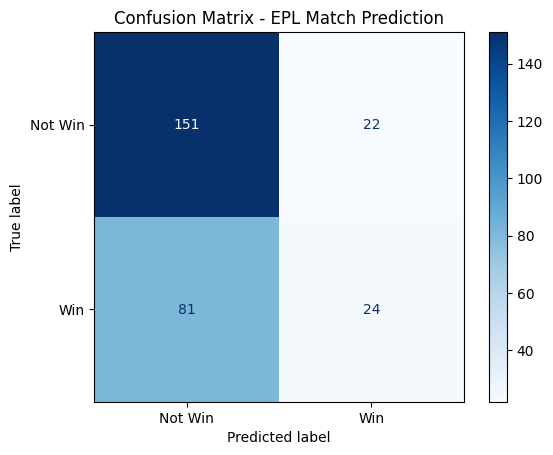

In [244]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Win", "Win"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - EPL Match Prediction")
plt.show()

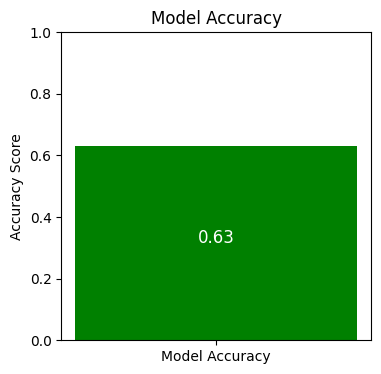

In [245]:

acc = accuracy_score(y_test, y_pred)
plt.figure(figsize=(4,4))
plt.bar(["Model Accuracy"], [acc], color='green')
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy Score")
plt.text(0, acc/2, f"{acc:.2f}", ha='center', color='white', fontsize=12)
plt.show()


In [246]:

joblib.dump(model, "epl_winner_model.pkl")

print("✅ Model saved as epl_winner_model.pkl")


✅ Model saved as epl_winner_model.pkl
